In [0]:
# Decision Tree Classifier Building in Scikit-learn
# Towards Data Science Tutorial: https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4
# KD Nuggets Tutorial: https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

# Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split         # For splitting into training & testing
from sklearn.preprocessing import StandardScaler         # For feature scaling
from sklearn.tree import DecisionTreeClassifier         # For fitting to Decision Tree
from sklearn import metrics         # To Check accuracy
from sklearn.metrics import confusion_matrix          # For confusion matrix
from matplotlib.colors import ListedColormap          # For visualization

In [2]:
# Load data
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
# Age and EstimatedSalary will be independet variables X because Gender and User ID have no impact on purchasing ability
feature_cols = ['Age','EstimatedSalary']
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [0]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 0)

In [0]:
# Scale features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
# Fit model to Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

In [23]:
# Make Predictions & Check Accuracy
# Predict against testing data
y_pred = classifier.predict(X_test)

# Check Accuracy
print(f'Accuracy Score: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.9


In [28]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
# 6 observations have been classified as false

array([[62,  6],
       [ 4, 28]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


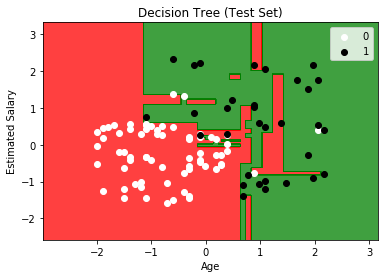

In [39]:
# Visualize Model Predictions
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('white','black'))(i),label=j)

plt.title('Decision Tree (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()